# Decision Trees

Let's get some important stuff out of the way. Here are the advantages and disadvantages of decision trees:

### advantages

1. When it classifies an instance you can ask *why*. Most machine learning techniques are called **black box models** which means that when it makes a decision you can't go inside and see how that decision was made.  For example, consider a task where we have 100 attributes and we are trying to predict whether someone has a particular kind of cancer. With an algorithm like Naive Bayes, which relies on probabilities, we can't ask "How did you come to the conclusion that this person will have cancer?" In contrast, decision trees can provide an answer to that question. 
2. It requires little data wrangling. We don't need to scale columns. It can handle missing data (although, not with the sklearn implementation)
3. It can handle categorical data while others (like kNN require only numeric). So for example, kNN requires a gender field of 0, 1 for example, but Decision Trees can handle 'male', 'female'. Although this is not exactly true with the sklearn version.
4. Is fairly fast. The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.

### disadvantages

1. Susceptible to overfitting the data. The training set is only a sample from some huge real world set (for example, even a training set of 1000 people who do and do not have diabetes, is tiny compared to all the people who do or do not have diabetes). The decision tree algorithm may add branches to the tree that improve performance for the instances in the dataset but decrease performance on the instances outside the dataset. This is the big wart on decision trees.
2. They don't work if you are trying to predict a continuous value. 
3. Learning the optimal decision tree is NP-complete.


Let's get to a simple example. 

## Iris Dataset yet again
<img src="https://upload.wikimedia.org/wikipedia/commons/1/1e/IMG_7911-Iris_virginica.jpg" width="250" />

Ok. Here is a very simple basic example. And we are going to use the Iris Dataset we used before.  As a reminder, the data set contains 3 classes of 50 instances each

1. Iris Setosa 
2. Iris Versicolour 
3. Iris Virginica (the picture above)

There are only 4 attributes or features:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 

Here is an example of the data:

Sepal Length|Sepal Width|Petal Length|Petal Width|Class
:--: | :--: |:--: |:--: |:--: 
5.3|3.7|1.5|0.2|Iris-setosa
5.0|3.3|1.4|0.2|Iris-setosa
5.0|2.0|3.5|1.0|Iris-versicolor
5.9|3.0|4.2|1.5|Iris-versicolor
6.3|3.4|5.6|2.4|Iris-virginica
6.4|3.1|5.5|1.8|Iris-virginica

The job of the classifier is to determine the class of an instance from the values of the attributes.

### Step 1: load the data

This dataset is so common that it is build into sklearn, but just for practice let's load our own csv file from

    https://raw.githubusercontent.com/zacharski/machine-learning/master/data/iris.csv

In [3]:
 # you load it
import pandas as pd
iris = pd.read_csv('https://raw.githubusercontent.com/zacharski/machine-learning/master/data/iris.csv')

### something new: splitting data into a training set and test set

When we used this Dataset before, I did some work for you. Namely, I divided the data into a training and test test. This time you loaded the entire dataset. With sklearn it is easy to divide a dataset into parts. Let's say I want to 80% of the data in the training set and 20 in the test set:

In [4]:
from sklearn.model_selection import train_test_split
iris_train, iris_test = train_test_split(iris, test_size = 0.2)
iris_train


,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
56,6.3,3.3,4.7,1.6,Iris-versicolor
79,5.7,2.6,3.5,1.0,Iris-versicolor
43,5.0,3.5,1.6,0.6,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa
30,4.8,3.1,1.6,0.2,Iris-setosa
53,5.5,2.3,4.0,1.3,Iris-versicolor
32,5.2,4.1,1.5,0.1,Iris-setosa
52,6.9,3.1,4.9,1.5,Iris-versicolor
7,5.0,3.4,1.5,0.2,Iris-setosa




### Step 2: create a decision tree classifier
Now it is time to create a decision tree classifier using entropy:


In [5]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy')

### Step 3: train the classifier on the data:
(the arguments are the same as the knn classifier)


In [6]:
clf.fit(iris_train[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']], iris_train['Class'])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Optional: viewing our decision tree

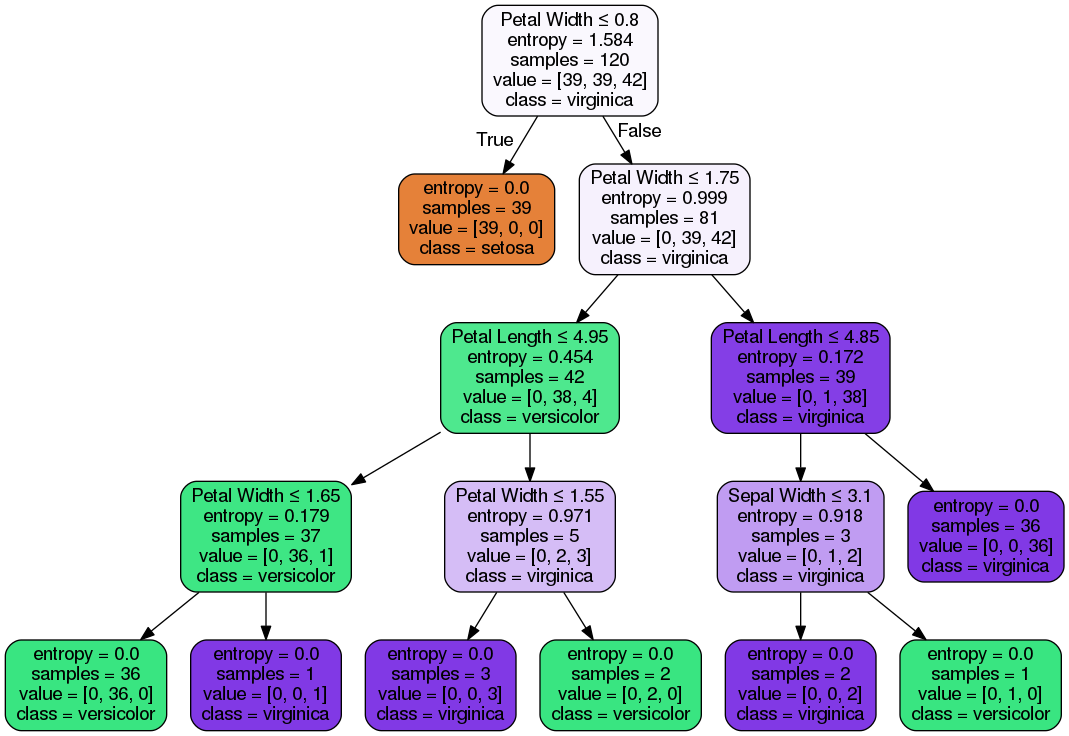

In [9]:
from IPython.display import Image  
import pydotplus
dot_data = tree.export_graphviz(clf, out_file="iris.dot", 
                         feature_names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'],  
                         class_names=['setosa', 'versicolor', 'virginica'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graphviz.graph_from_dot_file("iris.dot")
#graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png()) 

Ok. that is cool.

Let's try to classify the test set.

In [10]:
iris_predictions = clf.predict(iris_test[['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']])
from sklearn.metrics import accuracy_score
accuracy_score(iris_test['Class'], iris_predictions)
#, iris_train['Class'])

0.9666666666666667

Great! You should get 100% or near 100% accuracy on that small dataset.

## Part 1 - Pima 

The Pima Indians Diabetes Data Set was developed by the
United States National Institute of Diabetes and Digestive and Kidney Diseases. 

Astonishingly, over 30% of Pima people develop diabetes. In contrast, the diabetes rate in
the United States is 8.3% and in China it is 4.2%.

Each instance in the dataset represents information about a Pima woman over the age of 21
and belonged to one of two classes: a person who developed diabetes within five years, or a
person that did not. There are eight attributes in addition to the column representing whether or not they developed diabetes:


1.  The number of times the woman was pregnant
2.  Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3.  Diastolic blood pressure (mm Hg)
4.  Triceps skin fold thickness (mm) 
5.  2-Hour serum insulin (mu U/ml) 
6.  Body mass index (weight in kg/(height in m)^2) 
7.  Diabetes pedigree function 
8.  Age
9.  Whether they got diabetes or not (0 = no, 1 = yes)


The csv file at  is at

    https://raw.githubusercontent.com/yew1eb/machine-learning/master/Naive-bayes/pima-indians-diabetes.data.csv
    
<span style="color:red">This file does not have a header row</span>

You will need to 

1. load the file into a dataframe
2. divide the data into training and test sets. (an 80-20 split sounds good)
3. train a decision tree classifier on the training data using 10 fold cross validation
3. Adjust the hyperparameters to create the most accurate classifier
3. display the tree
3. run the classifier on the test data
4. compute the accuracy



## Part 2 - Adult Dataset

Do the same using the [The Adult Dataset](http://archive.ics.uci.edu/ml/datasets/Adult)
